In [1]:
import numpy as np
from src.hydra import io, pansharpen,utils
import matplotlib.pyplot as plt
import geopandas as gpd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
viirsFile = '/home/ubuntu/hydra/data/VNP09GA_NRT.A2018101.h27v07.001.h5'
%time viirs = io.viirs(viirsFile)

CPU times: user 1min 12s, sys: 45.8 s, total: 1min 58s
Wall time: 37 s


In [3]:
# Brovey algorithm
%time panImg_brv = pansharpen.brovey(viirs.bands['M5'],viirs.bands['M4'],viirs.bands['M3'],viirs.bands['M7'],viirs.bands['I3'],S=viirs.bands['M10'])

/home/ubuntu/notebooks/src/hydra/pansharpen.py:122: RuntimeWarning: divide by zero encountered in true_divide
  panImg[:,:,0] = _rescale(R / ((B + G + R) * P),R.max(),R.min())
/home/ubuntu/notebooks/src/hydra/pansharpen.py:123: RuntimeWarning: divide by zero encountered in true_divide
  panImg[:,:,1] = _rescale(G / ((B + G + R) * P),G.max(),G.min())
/home/ubuntu/notebooks/src/hydra/pansharpen.py:124: RuntimeWarning: divide by zero encountered in true_divide
  panImg[:,:,2] = _rescale(B / ((B + G + R) * P),B.max(),B.min())


CPU times: user 13.8 s, sys: 13.6 s, total: 27.4 s
Wall time: 17.2 s


/home/ubuntu/notebooks/src/hydra/pansharpen.py:125: RuntimeWarning: divide by zero encountered in true_divide
  panImg[:,:,3] = _rescale(I / ((B + G + R) * P),I.max(),I.min())


In [4]:
print(viirs.linearRing)

[(8785243.317026643, 1265865.289568173), (9205599.30501891, 2504483.1656074896), (10269102.347499091, 2501219.99324333), (9799482.394536324, 1262353.51973202)]


In [5]:
# import cartopy
# import cartopy.crs as ccrs

# hires_mndwi_brv = (panImg_brv[:,:,1] - viirs.bands['I3']) / (panImg_brv[:,:,1] + viirs.bands['I3'])

# ax = plt.axes(projection=ccrs.PlateCarree())
# plt.pcolormesh(viirs.coords['ILon'][:900,:900], viirs.coords['ILat'][:900,:900],hires_mndwi_brv[:900,:900],transform=ccrs.LambertCylindrical(),vmin=-1,vmax=1,cmap='Blues')

# ax.coastlines()
# ax.add_feature(cartopy.feature.BORDERS, linestyle='-')

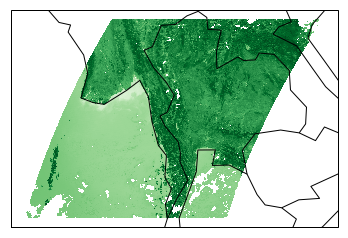

In [6]:
ndvi = viirs.normalizedDifference('M7','M5')
ndvi.plot('nd','MLat','MLon',vmin=-1,cmap='Greens')

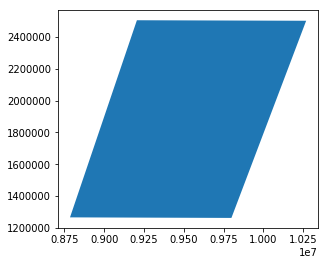

In [7]:
viirs.shape.plot()

In [8]:
import glob

In [9]:
inpath = '/home/ubuntu/hydra/data/'

In [10]:
file = glob.glob(inpath+'*_MTL.txt')[0]
file

'/home/ubuntu/hydra/data/LC08_L1TP_128048_20180411_20180411_01_RT_MTL.txt'

In [11]:
%time ls = io.landsat(file)

CPU times: user 3min 21s, sys: 7min, total: 10min 22s
Wall time: 2min 59s


In [12]:
# ls.shape.plot()

In [13]:
linRing = ls.linearRing
#linRing = [(2309100.530158211, 10038246.37878239), (2306259.2266694456, 9828472.662300508), (2048424.893141666, 9831919.15223107), (2050947.7421011988, 10039305.798139542)]
print(linRing)

[(10038246.37878239, 2309100.530158211), (9828472.662300508, 2306259.2266694456), (9831919.15223107, 2048424.893141666), (10039305.798139542, 2050947.7421011988)]


In [27]:
print(viirs.linearRing)

[(8785243.317026643, 1265865.289568173), (9205599.30501891, 2504483.1656074896), (10269102.347499091, 2501219.99324333), (9799482.394536324, 1262353.51973202)]


In [14]:
tt = utils.geoverts_2_imgverts(linRing,viirs.coords['ILat'],viirs.coords['ILon'])

In [15]:
print(tt)

[(2242, 381), (1513, 387), (2152, 894), (2293, 890)]


In [17]:
mask = utils.mask(linRing, viirs.coords['ILat'],viirs.coords['ILon'])

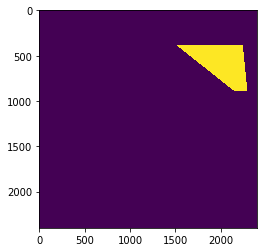

In [18]:
imshow(mask)

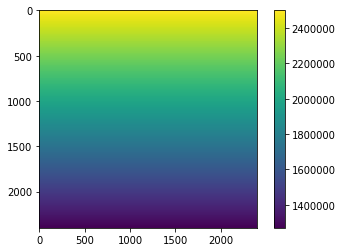

In [19]:
imshow(viirs.coords['ILat'])
colorbar()

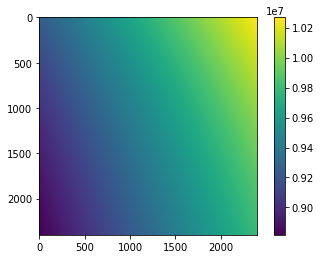

In [20]:
imshow(viirs.coords['ILon'])
colorbar()

In [21]:
mask = utils.mask(ls.linearRing, ls.coords['Lat'],ls.coords['Lon'])

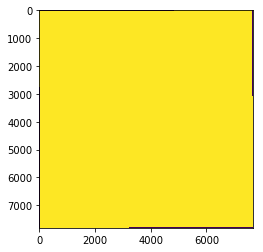

In [22]:
imshow(mask)

In [23]:
intersect = gpd.overlay(viirs.shape,ls.shape,how='symmetric_difference')

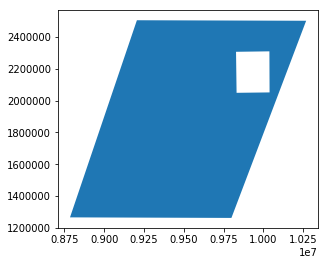

In [24]:
intersect.plot()

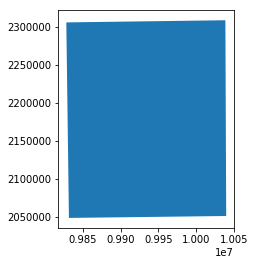

In [25]:
ls.shape.plot()

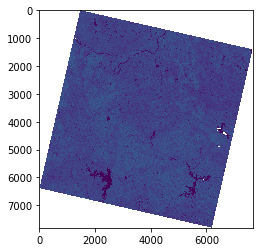

In [26]:
imshow(ls.bands['B5'])